In [1]:
# milostipanov@gmail.com 
# https://github.com/meteorids
# 2022

#This Code is to process the output from the NeuralNetwork-Predict. Creating plots and statistics. Will combine the output file from the NN and the NILU-data-process for time stamps.

In [2]:
#This block will create a plot of a daily data from NN-output and NILU-data-process output.

import pandas as pd


# Seting up data:

processed_data = pd.read_csv('../MachineLearning-NILU/nnoutput_20140602.txt',  sep=r'\s+', header=None)

timestamp     = pd.read_csv('./NILU-OUT/processed_nilu_20140602.txt',  sep=r'\s+', header=None)

date = timestamp[3]
time = timestamp[5]
doy  = timestamp[4]
sza  = timestamp[0]
scaled_ozone   = processed_data[0]
vol_frac       = processed_data[1]*10**-7

scaled_ozone2   = processed_data2[0]
vol_frac2       = processed_data2[1]*10**-7

print(type(scaled_ozone2))
# Converting scaled ozone to Dobson Units
# Scaled to standard US atmosphere, the equivalent depth of ozone is 3.45×10^−3 m, in Dobson units= 345 DU. 1 eqd = 10^5 DU
ozone_DU = scaled_ozone*345
ozone_DU2 = scaled_ozone2*345
# Converting cloud particle vol. frac. to COD. Based on simulations. see code: COD_vs_volfrac.ipynb
cod = vol_frac*152596238.214
cod2 = vol_frac2*152596238.214


df = pd.DataFrame({'DATE': date,
                   'TIMEUTC': time,
                    'DOY': doy,
                   'SZA': sza,
                   'O3': ozone_DU,
                   'COD': cod})

df2 = pd.DataFrame({'O32': ozone_DU2,
                    'COD2': cod2})


# Filtering 1 day worth of data from the whole input

#sza
#processed_data[0]

df.to_csv("./STATS-PLOTS-OUT/dataframe.csv")

#print(df)

#print(df['O3'].mean)

<class 'pandas.core.series.Series'>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import matplotlib.dates as mdates
import pytz
from dateutil import tz

# Let's plot 1 day
# Enter a day number:
choosen_day = 153

x=[ ]
y=[ ]
y2 = []
z = []
z2 = []

for i in range(len(df.DOY)):
    if df.DOY[i] == choosen_day:
        date2 = str(df.DATE[i])
        year = date2[0:4]
        month = date2[4:6]
        day = date2[6:8]
        time2 = str(df.TIMEUTC[i])
        hour = time2[0:2]
        minute = time2[2:]
        my_datetime = datetime.datetime(int(year),int(month),int(day),int(hour),int(minute),0,0, tzinfo = pytz.utc)
        my_datetime_utc = my_datetime.strftime('%Y-%m-%d %H:%M:%S %Z%z')
#        my_datetime_est = my_datetime.astimezone(pytz.timezone('US/Eastern')).strftime('%Y-%m-%d %H:%M:%S %Z%z')
        my_datetime_est = my_datetime.astimezone(pytz.timezone('US/Eastern'))
#        print(my_datetime_est)
        x.append(my_datetime_est)
        y.append(df.O3[i])
        y2.append(df2.O32[i])
        z.append(df.COD[i])
        z2.append(df2.COD2[i])
        
       
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M',tz=tz.gettz('US/Eastern')))
fig.autofmt_xdate()

#ax.plot(y, marker='.')
#ax.set_xticks([i for i in range(len(y))])
#ax.set_xticklabels(x)
#ax.locator_params(nbins=10)


plt.scatter(x, y, marker='.', color='blue')
plt.scatter(x, y2, marker='.', color='red')
plt.show()

#print(y)

NameError: name 'df' is not defined

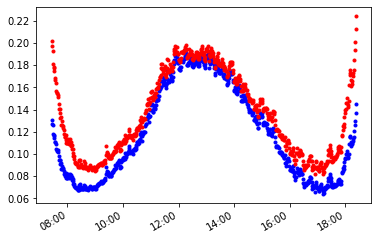

In [4]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M',tz=tz.gettz('US/Eastern')))
fig.autofmt_xdate()
plt.scatter(x, z, marker='.', color='blue')
plt.scatter(x, z2, marker='.', color='red')
plt.show()

In [5]:
# Convert day number to date in particular year
from datetime import datetime
  
# initializing day number
day_num = "153"
  
# print day number
print("The day number : " + str(day_num))
  
# adjusting day num
#day_num.rjust(3 + len(day_num), '0')
  
# Initialize year
year = "2014"
  
# converting to date
res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
  
# printing result
print("Resolved date : " + str(res))

The day number : 153
Resolved date : 06-02-2014


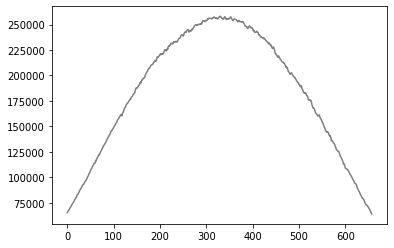

In [6]:
# Check how clear the day is by plotting raw ch5 vs time

day = 153

# Clean days found so far:
# 2014: 110, 153

ch5  = timestamp[1]
ch5df = pd.DataFrame({'CH5': ch5})


CH5=[ ]
for i in range(len(df.DOY)):
    if df.DOY[i] == day:
        CH5.append(ch5df.CH5[i])
        
        
T = range(len(CH5))      


    
plt.tight_layout()
plt.plot(T, CH5, color='gray')
plt.show()